### 1) 미니 프로젝트 배경

> 당신은 미국 민주당 선거대책본부 SNS 분석팀에서 자원봉사자 분석가로 활동하고 있습니다. 차기 대통령 선거에 출마가 유력한 경쟁후보인 트럼프 전 대통령의 트윗을 분석하는 프로젝트를 준비하고 있습니다. 프로젝트 기획서를 작성하기 위한 기초자료로 활용하기 위하여 트럼프의 과거 트윗을 분석하려고 합니다.


### 2) 미니 프로젝트 요구사항

- 1. 캐글([www.kaggle.com](http://www.kaggle.com))은 인공지능과 데이터 분석에 관심이 있는 전세계 분석가들이 모여서 활동하는 대표적인 커뮤니티입니다. 트럼프 대통령의 트윗 데이터셋([https://www.kaggle.com/datasets/austinreese/trump-tweets](https://www.kaggle.com/datasets/austinreese/trump-tweets))을 다운로드하여 내용을 분석합니다. 
2. Pandas 라이브러리를 이용하여 트럼프 대통령의 트윗 게시글 수의 증감과 트위터 이용자들의 반응을 분석합니다. 
3. Pandas 라이브러리에서 내장된 plot 함수를 활용하여 분석 결과를 시각화하여 표현합니다. 그리고, 비정형 데이터인 트윗 텍스트를 시각화하기 위하여 WordCloud를 생성합니다.

### 진행시 주의사항
- [ ]  캐글 커뮤니티에 가입해서 데이터셋을 다운로드했나요? - 완료 
- [ ]  결측값을 확인하고 분석에 필요한 변수(컬럼)를 추출했나요?
- [ ]  문자열 함수(split, replace)를 활용하여 시간 변수를 추출했나요?
- [ ]  판다스 plot 함수의 사용법을 이해하고 적용했나요?
- [ ]  wordcloud 라이브러리를 설치하고, WordCloud 함수를 불러서 활용했나요?

### 3-1) 캐글을 이용해 내용 분석하기

In [13]:
%pip install wordcloud
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import numpy as np

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [14]:
df = pd.read_csv('./trumptweets.csv')
df.head()

,id,link,content,date,retweets,favorites,mentions,hashtags,geo
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,NaN,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,NaN,NaN,NaN
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18,NaN,NaN,NaN
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24,NaN,NaN,NaN
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965,NaN,NaN,NaN


### 3-2) Pandas 라이브러리를 이용하여 트럼프 대통령의 트윗 게시글 수의 증감 분석  

['year', 'freq']

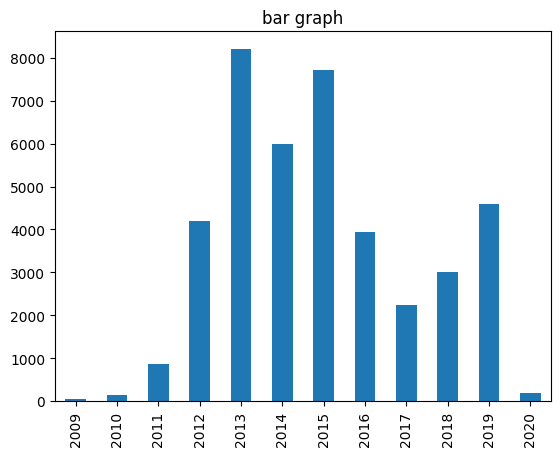

In [15]:
date_df = df['date']

#날짜 요소만 가지고 와서 연/월별로 구분할 예정
date_li = list()
for line in date_df:
    date_li.append(line.strip())

date_year_li = list()
#연 요소만 가지고 오기 
for line in date_li:
    date_year_li.append(line[:4])

date_year_dict = dict()
for date in date_year_li:
    date_year_dict[date] = 0

year_li = list()
freq_li = list()
for key,item in date_year_dict.items():
    freq_li.append(int(date_year_li.count(key)))
    year_li.append(int(key))
 


year_df = pd.Series(freq_li, index = pd.Index(year_li))
year_df.columns=['year', 'freq']
#연도 빈도수 막대그래프로 확인하기
year_df.plot(kind='bar', title= 'bar graph')


year_df.columns


<AxesSubplot: title={'center': 'pie graph'}>

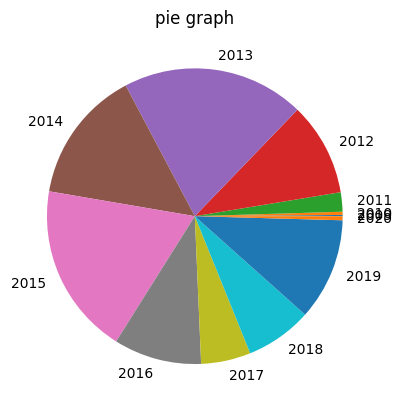

In [16]:
year_df.plot(kind= 'pie', title= 'pie graph')


<AxesSubplot: title={'center': 'line graph'}, xlabel='year', ylabel='frequency'>

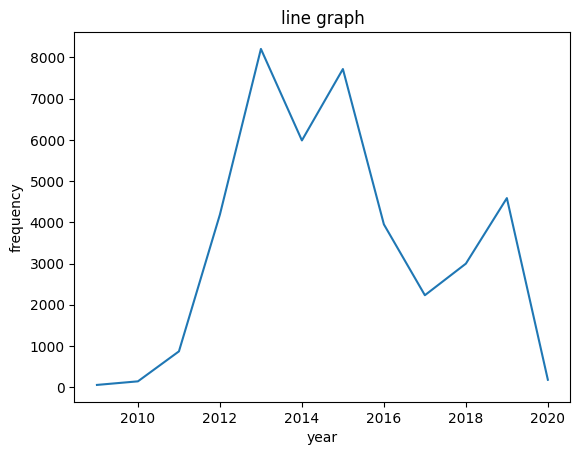

In [17]:
year_df.plot(kind= 'line', title = 'line graph', xlabel = 'year', ylabel = 'frequency')


{'2009': 56, '2010': 143, '2011': 870, '2012': 4190, '2013': 8207, '2014': 5987, '2015': 7719, '2016': 3951, '2017': 2232, '2018': 2998, '2019': 4588, '2020': 181}


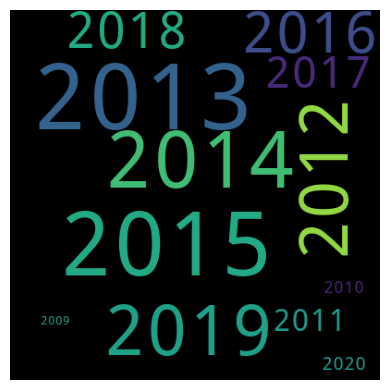

In [18]:
import matplotlib.pyplot as plt
year_freq_dict= dict()
for i in range(len(year_li)):
    year_freq_dict[str(year_li[i])] = freq_li[i]

dict_data = year_freq_dict
print(dict_data)
# WordCloud 생성
from wordcloud import WordCloud, STOPWORDS 

wordcloud = WordCloud(width = 400, height = 400, 
                      background_color ='black', 
                      stopwords = set(STOPWORDS), 
                      max_font_size = 100,
                     ).generate_from_frequencies(dict_data) 
# WordCloud 출력                    
plt.figure(figsize = (4, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout() 
plt.show()
 

### 3-3) Pandas 라이브러리를 이용하여 트럼프 대통령의 트윗 게시글에 대한 반응 분석  

In [19]:
%matplotlib inline  
import pandas as pd
import matplotlib.pyplot as plt 
import wordcloud 
import seaborn as sns

In [20]:
df= pd.read_csv('./trumptweets.csv') 
df.head(3)

,id,link,content,date,retweets,favorites,mentions,hashtags,geo
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,NaN,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,NaN,NaN,NaN
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18,NaN,NaN,NaN


> column명에 retweets, favorites 이용해서 리트윗이랑 favorites랑 상관계수 확인해보기 및 트윗 게시글 년도에 따른 호감도 확인해보기 

#### 3-3-1) column명에 retweets, favorites 이용해서 리트윗이랑 favorites랑 상관계수 확인해보기

In [21]:
ret_favor_df = df.loc[:,'retweets':'favorites']
ret_favor_df.corr() # -> 좋아요와 리트윗사이에는 비슷한 상관계수를 가지고 있음을 알 수 있다. 

,retweets,favorites
retweets,1.000000,0.944441
favorites,0.944441,1.000000


<AxesSubplot: >

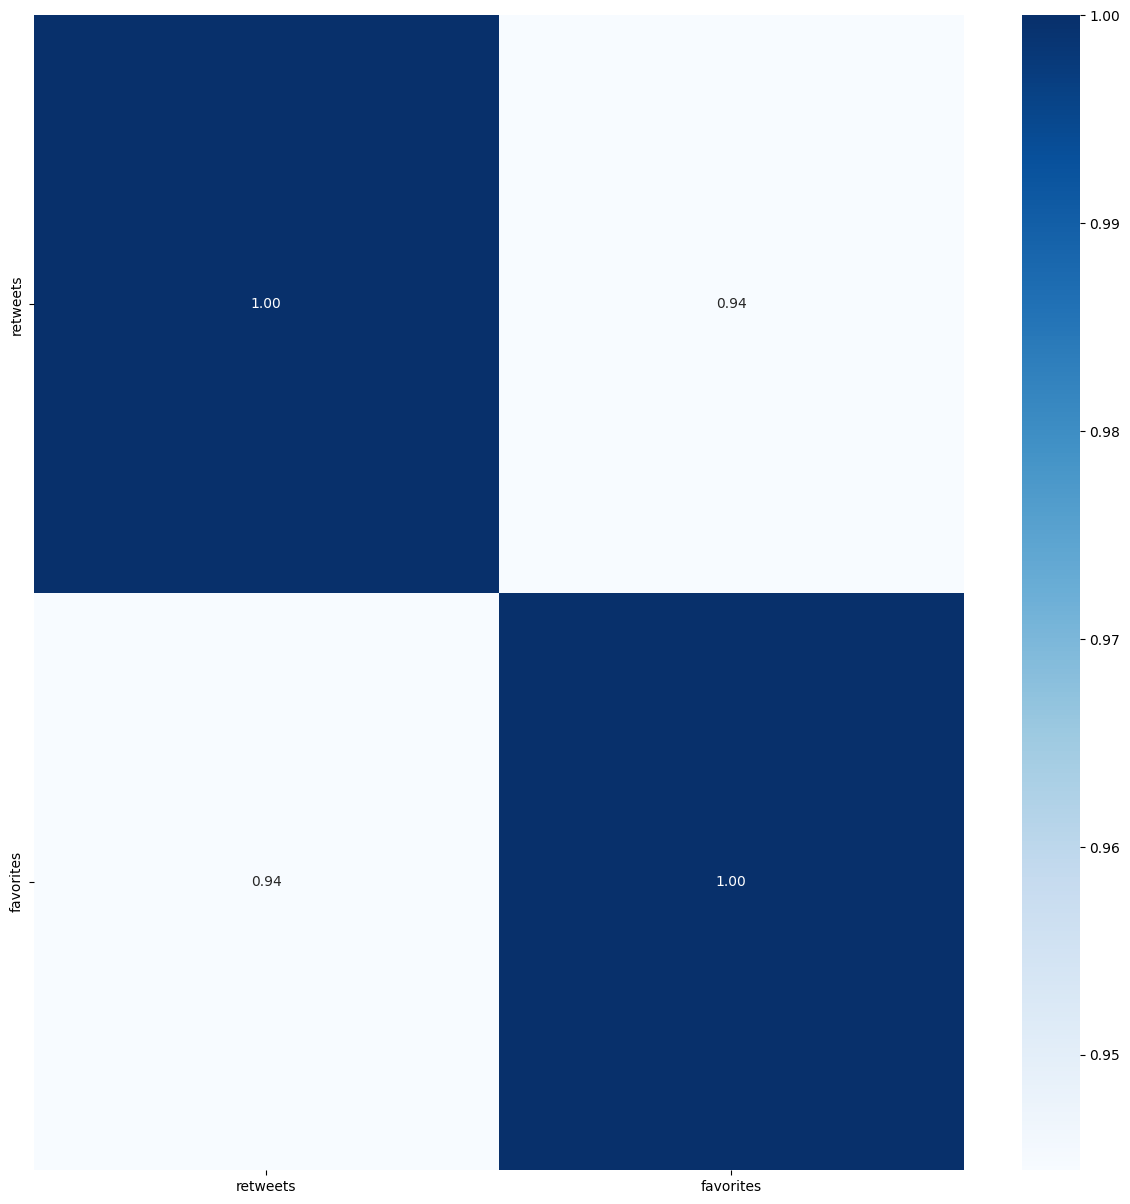

In [22]:
plt.figure(figsize=(15,15))
sns.heatmap(data = ret_favor_df.corr(), annot=True, 
fmt = '.2f', cmap='Blues')
##비슷한 상관계수를 가짐 

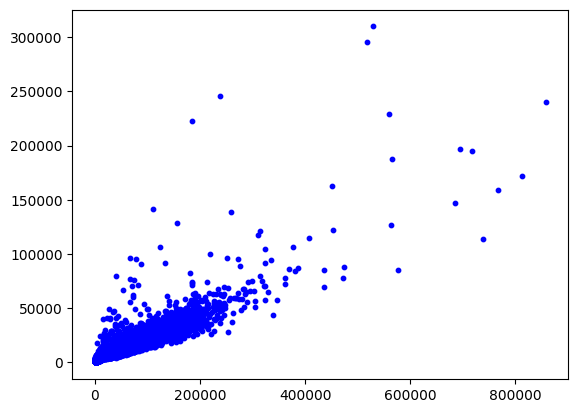

In [23]:
#산점도로도 만들어보자
plt.scatter(ret_favor_df['favorites'], ret_favor_df['retweets'], s=10, c='blue')
#x축 : favorites, y축 : retweets 

 #### 3-3-2) 트윗 게시글 년도에 따른 호감도 확인해보기 

In [49]:
%matplotlib inline 
import pandas as pd 
import matplotlib.pyplot as plt
import wordcloud
import seaborn as sns 

In [50]:
df =pd.read_csv('./trumptweets.csv')
df.head(3)

,id,link,content,date,retweets,favorites,mentions,hashtags,geo
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,NaN,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,NaN,NaN,NaN
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18,NaN,NaN,NaN


In [51]:
#사용할 컬럼 date:favorites 
use_df = df.loc[:,'date':'favorites']
use_df

,date,retweets,favorites
0,2009-05-04 20:54:25,500,868
1,2009-05-05 03:00:10,33,273
2,2009-05-08 15:38:08,12,18
3,2009-05-08 22:40:15,11,24
4,2009-05-12 16:07:28,1399,1965
...,...,...,...
41117,2020-01-19 19:24:52,32620,213817
41118,2020-01-19 22:12:20,36239,149571
41119,2020-01-20 01:27:07,16588,66944
41120,2020-01-20 02:16:00,20599,81921


In [52]:
#사용할 컬럼에서 date를 추출해서 년도별로 나누기
date_li = list(use_df['date'])

for i in range(len(date_li)):
    date_li[i] = date_li[i][:4]
date_li[:10]

['2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009']

In [53]:
#use_df에 넣기
use_df['date'] = date_li 
use_df.head(3)

,date,retweets,favorites
0,2009,500,868
1,2009,33,273
2,2009,12,18


In [29]:
#연도별로 리트윗/좋아요 수 확인해보기 
count_retweets = dict()
count_favorites = dict()

count_retweets_li = list(use_df['retweets'])
count_favorites_li = list(use_df['favorites'])


for i in list(use_df['date']):
    count_retweets[i] = 0 
    count_favorites[i] = 0 
for i in range(len(list(use_df['date']))):
    count_retweets[use_df['date'][i]] += count_retweets_li[i]
    count_favorites[use_df['date'][i]] += count_favorites_li[i]
    
print("리트윗 : {}".format(count_retweets))
print("좋아요 : {}".format(count_favorites))

리트윗 : {'2009': 3889, '2010': 26707, '2011': 240930, '2012': 2179297, '2013': 2715331, '2014': 1808060, '2015': 4570044, '2016': 26165104, '2017': 37155462, '2018': 55805075, '2019': 88449499, '2020': 5225401}
좋아요 : {'2009': 5925, '2010': 25855, '2011': 170173, '2012': 1587226, '2013': 2492672, '2014': 1995800, '2015': 9202542, '2016': 75884066, '2017': 168645479, '2018': 245880299, '2019': 388123797, '2020': 25346571}


> 리트윗수 연도별로 wordcloud만들어보기 

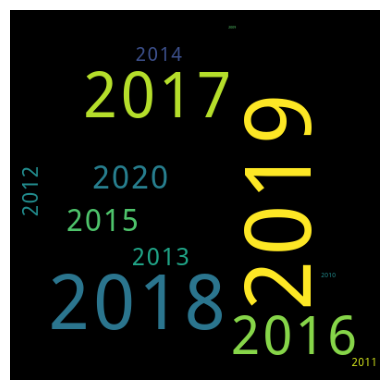

In [30]:
#입력 : 딕셔너리로
dict_data =count_retweets

from wordcloud import WordCloud, STOPWORDS 
wordcloud = WordCloud(width = 400, height = 400, 
                      background_color ='black', 
                      stopwords = set(STOPWORDS), 
                      max_font_size = 100,
                     ).generate_from_frequencies(dict_data) 
  
# WordCloud 출력                    
plt.figure(figsize = (4, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout() 
plt.show()

#2019, 2018, 2017년 순으로 리트윗 된 것이 많음을 알 수 있다. 

> 좋아요수 연도별로 wordcloud만들어보기 

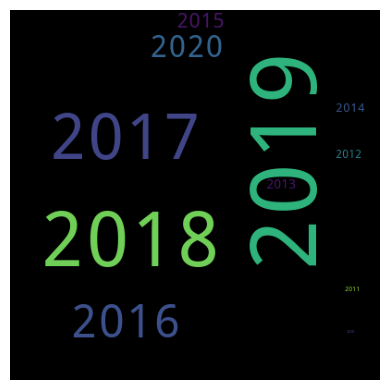

In [31]:
#입력 : 딕셔너리로
dict_data =count_favorites

from wordcloud import WordCloud, STOPWORDS 
wordcloud = WordCloud(width = 400, height = 400, 
                      background_color ='black', 
                      stopwords = set(STOPWORDS), 
                      max_font_size = 100,
                     ).generate_from_frequencies(dict_data) 
  
# WordCloud 출력                    
plt.figure(figsize = (4, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout() 
plt.show()

#2019, 2018, 2017년으로 높다 

> 결론 : 리트윗수와 좋아요수는 비례하다. 좋아하는 사람이 많은 만큼 리트윗수도 증가한다. 상관계수 관계를 확인할 수 있다., 

### 4-1)  비정형 데이터 트윗 텍스를 wordcloud로 생성 및 분석
트럼프가 가장 많이 언급한 키워드는 무엇일지 알아보기 

In [32]:
%matplotlib inline 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import wordcloud 
import numpy as np

In [33]:
# 데이터 가지고오기
df = pd.read_csv('./trumptweets.csv')
df.head(3)

,id,link,content,date,retweets,favorites,mentions,hashtags,geo
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,NaN,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,NaN,NaN,NaN
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18,NaN,NaN,NaN


#### 4-1-2) 빈도분석 Eng버젼

#### 비정형데이터가지고 오기 "content"
#### 아래의 링크를 참고함
#### https://chaelist.github.io/docs/text_analysis/english_text/

#### 1. nltk 준비 및 데이터 재료 준비 


In [68]:
# 비정형데이터가지고 오기 "content"
# 아래의 링크를 참고함
# https://chaelist.github.io/docs/text_analysis/english_text/
#nltk 준비 및 데이터 재료 준비 
%pip install nltk

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.5 MB 993 kB/s eta 0:00:01
     |████████████████████████████████| 78 kB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 287 kB 2.3 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [69]:
import nltk 
nltk.download('all') # 한 컴퓨터에 한 번 만 해두면 됨

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/choedaehyeon/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/choedaehyeon/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/choedaehyeon/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/choedaehyeon/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /Users/choedaehyeon/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to
[nltk_data]    |     /U

True

#### 2) 데이터 수집

In [78]:
 
content = list(df['content'])
nltk_data = " ".join(content)
nltk_data[:1000]

'Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight! Donald Trump will be appearing on The View tomorrow morning to discuss Celebrity Apprentice and his new book Think Like A Champion! Donald Trump reads Top Ten Financial Tips on Late Show with David Letterman: http://tinyurl.com/ooafwn - Very funny! New Blog Post: Celebrity Apprentice Finale and Lessons Learned Along the Way: http://tinyurl.com/qlux5e "My persona will never be that of a wallflower - I’d rather build walls than cling to them" --Donald J. Trump Miss USA Tara Conner will not be fired - "I\'ve always been a believer in second chances." says Donald Trump Listen to an interview with Donald Trump discussing his new book, Think Like A Champion: http://tinyurl.com/qs24vl "Strive for wholeness and keep your sense of wonder intact." --Donald J. Trump http://tinyurl.com/pqpfvm Enter the "Think Like A Champion" signed book and keychain contest: http://www.trumpthink

#### 3) 데이터 전처리 

> 전처리 과정 (English):

>Text Cleaning: 불필요한 기호 / 표현 없애기(예, !, ., “, ; 등)

>Case Conversion: 대소문자 변환. 소문자 ↔ 대문자

>Tokenization: 단어 (혹은 Token) 단위로 잘라주기

>POS tagging: 단어의 품사 찾기

>원하는 품사의 단어들만 선택

>Lemmatization: (=Stemming) 단어의 원형(혹은 어근) 찾기

>Stopwords Removal: 불용어 제거

* 필요에 따라서는 위 과정의 순서가 바뀔수도 있고, 같은 과정을 반복 수행할 수도 있다

> #### 1. Text Cleaning : 불필요한 기호 없애기 - 정규식 사용
> #### 2. Case Conversion : 대소문자 구분되는 것을 통일시켜주기

In [79]:
# Text Cleaning : 불필요한 기호 없애기 - 정규식 사용
import re

filtered_content = re.sub('[^,.?!\w\s]','', nltk_data) #### ,.?!와 문자+숫자+_(\w)와 공백(\s)만 남김

# Case Conversion : 대소문자 구분되는 것을 통일시켜주기
filtered_content = filtered_content.lower()

filtered_content[:2000]

'be sure to tune in and watch donald trump on late night with david letterman as he presents the top ten list tonight! donald trump will be appearing on the view tomorrow morning to discuss celebrity apprentice and his new book think like a champion! donald trump reads top ten financial tips on late show with david letterman httptinyurl.comooafwn  very funny! new blog post celebrity apprentice finale and lessons learned along the way httptinyurl.comqlux5e my persona will never be that of a wallflower  id rather build walls than cling to them donald j. trump miss usa tara conner will not be fired  ive always been a believer in second chances. says donald trump listen to an interview with donald trump discussing his new book, think like a champion httptinyurl.comqs24vl strive for wholeness and keep your sense of wonder intact. donald j. trump httptinyurl.compqpfvm enter the think like a champion signed book and keychain contest httpwww.trumpthinklikeachampion.comcontest when the achiever

> #### 3. Tokenization : 단어 단위로 잘라주기

In [86]:
# Tokenization : 단어 단위로 잘라주기
# nltk.word_tokenize() 함수 사용하거나 split() 메소드로 나눌 수 있음 
import nltk
word_tokens = nltk.word_tokenize(filtered_content) #좀 오래걸린다.
print(word_tokens[:20]) 

['be', 'sure', 'to', 'tune', 'in', 'and', 'watch', 'donald', 'trump', 'on', 'late', 'night', 'with', 'david', 'letterman', 'as', 'he', 'presents', 'the', 'top']


In [83]:
split_word_token = filtered_content.split(' ')
print(split_word_token[:20]) 


['be', 'sure', 'to', 'tune', 'in', 'and', 'watch', 'donald', 'trump', 'on', 'late', 'night', 'with', 'david', 'letterman', 'as', 'he', 'presents', 'the', 'top']


> ### 4. POS tagging


> ##### tag된 품사의 종류 해석하는 법: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html 참조


In [89]:
# POS tagging : 각 단어의 품사를 찾아 태깅하기
# nltk.pos_tag() 메소드를 이용해 품사 태깅함
tokens_pos = nltk.pos_tag(word_tokens) #알아서 분석해줌 -> 리스트로 바꿔줌 
print(type(tokens_pos[1]))



<class 'tuple'>


> #### 4-1. POS tagging : 특정 PoS의 단어들만 추출하기 (명사만 추출해보기)


In [92]:
#명사만 추출
NN_words = list()

for word, pos in tokens_pos:
    if 'NN' in pos:
        NN_words.append(word)

print(NN_words[:20])

['donald', 'trump', 'night', 'letterman', 'ten', 'list', 'tonight', 'donald', 'trump', 'view', 'tomorrow', 'morning', 'celebrity', 'apprentice', 'book', 'champion', 'donald', 'reads', 'tips', 'show']


> #### 5. Lemmatization

In [91]:
# Lemmatization
# lemma = 원형, 단어를 원형으로 바꿔줌 ex) 과거동사 -> 동사원형, 명사는 단수형으로 
# nltk.WordNetLemmatizer() 사용

wlem = nltk.WordNetLemmatizer()
lemmatization_words = list()

for word in NN_words:
    new_word = wlem.lemmatize(word)
    lemmatization_words.append(new_word)

print(lemmatization_words[:20])
#reads -> read로 바뀜 

['donald', 'trump', 'night', 'letterman', 'ten', 'list', 'tonight', 'donald', 'trump', 'view', 'tomorrow', 'morning', 'celebrity', 'apprentice', 'book', 'champion', 'donald', 'read', 'tip', 'show']


> #### 6. Stopwords Removal

In [93]:
# Stopwords Removal : 불용어(ex_ a, an, the, this, taht) 제거
# 1차적으로 nltk에서 제공하는 불용어사전을 이용해 불용어 제거
from nltk.corpus import stopwords
stopwords_list =stopwords.words('english') #nltk에서 제공하는 영어 불용어사전을 stopwords_list에 넣기 

unique_NN_words = set(lemmatization_words) #중복 제거를 위해 set으로 변환
final_NN_words = lemmatization_words  #final_NN_words에 있는 불용어 제거하기

for word in unique_NN_words:
    if word in stopwords_list:
        while word in final_NN_words: final_NN_words.remove(word)

print(final_NN_words[:20])



['donald', 'trump', 'night', 'letterman', 'ten', 'list', 'tonight', 'donald', 'trump', 'view', 'tomorrow', 'morning', 'celebrity', 'apprentice', 'book', 'champion', 'donald', 'read', 'tip', 'show']


> #### 7. Frequency Analysis

In [95]:
# Frequency Analysis : final__NN_words로 빈도분석하면됨
# counter() : 단어 사용 빈도 계산 ㅗㅁ듈
from collections import Counter

c = Counter(final_NN_words) #단어 얼마나 사용했는지 딕셔너리로 만들어줌
print(c.most_common(10)) #딕셔너리이므로 10개만 .most_common(n) 메소드로 가져와보기

#realdonaldtrump , trump, president, people 등 이 많이 사용되었다. 

[('realdonaldtrump', 6993), ('trump', 4238), ('president', 2865), ('people', 2491), ('thank', 2249), ('thanks', 2119), ('country', 2112), ('time', 1857), ('job', 1665), ('year', 1503)]


#### 4. Wordcloud로 가장 많이 나온 키워드는 무엇인지 보기

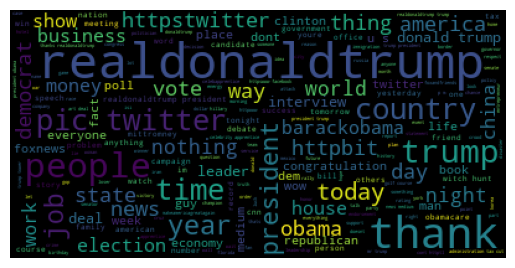

In [99]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#문자안에 다 넣기 
word_str = str()
for word in final_NN_words:
    word_str = word_str + ' ' + word 

# wordcloud 로 표현하기
wordcloud = WordCloud(max_font_size = 40, relative_scaling=.5,).generate(word_str)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

> 결론 : 자신의 이름과 사람, 그리고 대통령이름을 많이 언급하고 자신과 obama에 대한 얘기를 많이 하는 것으로 보인다.